# Resampling of histograms

This notebook illustrates a technique to interpolate / resample histograms based on the interpolation of the cumulative distribution. 

In [1]:
from scipy.interpolate import interp1d
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

First we generate a fake events, by sampling from a normal distribution:

In [2]:
N_SAMPLES = 1_000_000
norm_pdf = norm(scale=1)
samples = norm_pdf.rvs(size=N_SAMPLES)

The we histogram the data:

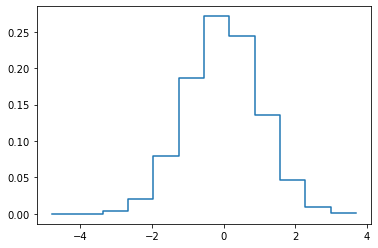

In [3]:
edges = np.linspace(-5.5, 3.7, 14)
data, _ = np.histogram(samples, bins=edges)
data = data / data.sum()
plt.step(edges[1:], data, where="pre")

Then we compute the cumulative distribution and setup the interpolation function:

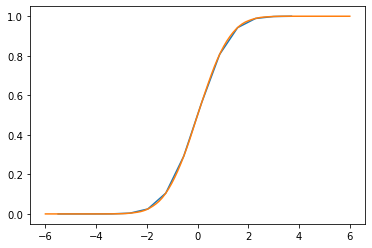

In [4]:
cumsum = np.insert(data.cumsum(), 0, 0)
cumsum = cumsum / cumsum[-1]
f_integral = interp1d(
    edges, cumsum, bounds_error=False,
    fill_value=(0, 1), kind="quadratic"
)

plt.plot(edges, np.insert(data.cumsum(), 0, 0))

x = np.linspace(-6, 6, 100)
plt.plot(x, np.clip(f_integral(x), 0, 1))

Now we can reasmple the distribution for arbitrary new binning, while keeping the total normalisation:

In [5]:
def plot_resampled_distribution(samples, f_integral, nbins=31):
    edges_new = np.linspace(-6, 6, nbins)
    data, _ = np.histogram(samples, bins=edges_new)
    data = data / data.sum()
    plt.step(edges_new[1:], data, where="pre", label="Histogram")
    
    values = np.diff(np.clip(f_integral(edges_new), 0, len(samples)))
    print(f"Norm true        : {data.sum()}")
    print(f"Norm interpolated: {values.sum()}")
    plt.step(edges_new[1:], values, label="Interpolation")
    plt.legend()

Norm true        : 1.0
Norm interpolated: 1.0


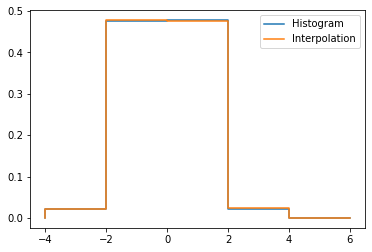

In [6]:
plot_resampled_distribution(samples, f_integral, nbins=7)

Norm true        : 1.0
Norm interpolated: 1.0


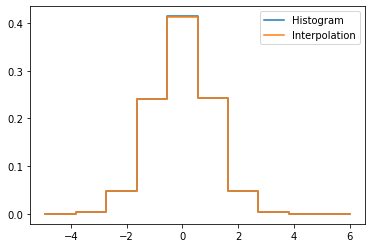

In [7]:
plot_resampled_distribution(samples, f_integral, nbins=12)

Norm true        : 1.0
Norm interpolated: 1.0


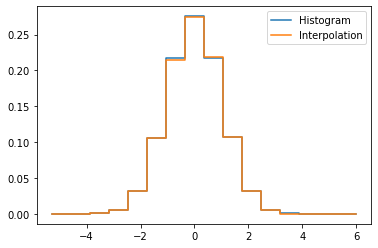

In [8]:
plot_resampled_distribution(samples, f_integral, nbins=18)

Norm true        : 1.0
Norm interpolated: 1.0


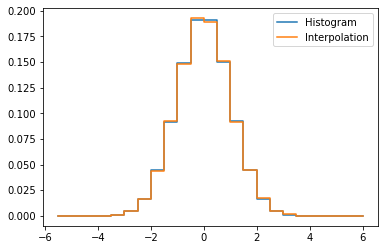

In [9]:
plot_resampled_distribution(samples, f_integral, nbins=25)

Norm true        : 1.0
Norm interpolated: 1.0


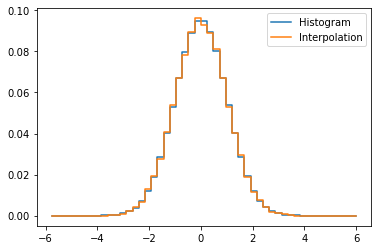

In [10]:
plot_resampled_distribution(samples, f_integral, nbins=51)

Norm true        : 1.0
Norm interpolated: 1.0


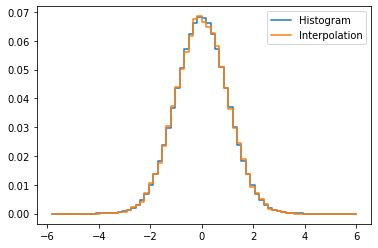

In [11]:
plot_resampled_distribution(samples, f_integral, nbins=71)